In [16]:
import numpy as np
import math

In [17]:
G = 10E9
NUMBER_OF_USERS = 30
FLOOR_HEIGHT = 5
BUILDING_BASE = 30
BUILDING_HEIGHT = 30
carrier_frequency = 2 * G
g1, g2, g3, g4 = 32.4, 14, 15, 0.5 
w = 20
MAX_USERS_PER_FLOOR = 5
coordinates_uav = [0, 0, 0] 
users_positions= np.full((NUMBER_OF_USERS, 3), fill_value=[1,1,1])

In [18]:
x_coordinates = np.arange(NUMBER_OF_USERS)
y_coordinates = np.arange(NUMBER_OF_USERS)
z_coordinates = np.arange(NUMBER_OF_USERS)
np.random.shuffle(x_coordinates)
np.random.shuffle(y_coordinates)
np.random.shuffle(z_coordinates)
for i in range(int(NUMBER_OF_USERS) / 2):
    users_positions[i][0] = x_coordinates[i]
    users_positions[i][2] = (BUILDING_BASE + 2) / 2
    users_positions[i][1] = y_coordinates[i]
for i in range(int(NUMBER_OF_USERS) / 2):
    users_positions[i][0] = x_coordinates[i]
    users_positions[i][2] = (BUILDING_BASE - 2) / 2
    users_positions[i][1] = y_coordinates[i]

We can see how the users are spreaded throughout the building by plotting
each user as a dot on a plane.

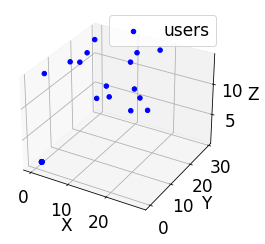

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
[x_plot_xy, y_plot_xy, z_plot_xy] = users_positions.T
ax.scatter(x_plot_xy, y_plot_xy, z_plot_xy, alpha=1, color='blue', label='users')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.savefig('graphs/usuarios.pdf')

The theorems showed in the paper tell us that the best coordinates y and z for the uav
are equal to half of they magnitude. Now, there's only one coordinate remaining until
we can find the best position of our uav: the x coordinate

In [20]:
coordinates_uav[1] = 15
coordinates_uav[2] = 15

In [21]:
def calculate_distance_drone_users(coordinates_uav, users_positions):
    distance_drone_users = []
    for i in range(len(users_positions)):
        distance_drone_user = np.linalg.norm(users_positions[i] - coordinates_uav)
        distance_drone_users.append(distance_drone_user)
    return distance_drone_users


In [22]:
def calculate_angle_users(users_position, coordinates_uav, distance_drone_users):
    angle_users= []
    for i in range(len(users_position)):
        angle_user = np.arccos( ( ((coordinates_uav[0] - users_position[i][0]) ** 2 + 
        (coordinates_uav[1] - users_position[i][1]) ** 2) ** 0.5 )/distance_drone_users[i])
        angle_users.append(angle_user)
    return angle_users

Defines the Loss function to be optimized in order to minimize the transmit power


In [23]:
def loss(coordinates_uav, w, distance_drone_users, users_coordinates , angle_users, g1, g2, g3, g4, frequency):
    loss = 0
    for i in range(len(distance_drone_users)):
        k = w * math.log10(frequency) + g1 + g2 + g4 * np.linalg.norm(users_coordinates[i][0:2] - 
        coordinates_uav[0:2])
        loss += w * np.log10(distance_drone_users[i]) + g3 * (1 - np.cos(angle_users[i]) ** 2) + k 
    return loss

In [24]:
print(coordinates_uav[0:3])

[0, 15, 15]


Plot the loss function for the problem


In [25]:
def gradient(uav_coordinates, distance_drone_users, users_coordinates, w, g3):
    gradient_value = 0
    for i in range(len(users_coordinates)):
        gradient_value += (- w * (users_coordinates[i][0] - uav_coordinates[0]) / (math.log(10) 
        * distance_drone_users[i] ** 2)) + 2 * g3 * (1 - ( (((users_coordinates[i][0] - 
        uav_coordinates[0]) ** 2 + (users_coordinates[i][1] - uav_coordinates[1]) ** 2) ** 0.5) 
        / distance_drone_users[i])) * ( (( ((users_coordinates[i][0] - uav_coordinates[0])**2) * 
        distance_drone_users[i] * ( float(( ((users_coordinates[i][0] - uav_coordinates[0]) ** 2) + 
        ((users_coordinates[i][1] - uav_coordinates[1]) ** 2 ))) ** -0.5))) / (distance_drone_users[i] ** 2) - 
        ( ((((users_coordinates[i][0] - uav_coordinates[0]) ** 2) + ((users_coordinates[i][1] - 
        uav_coordinates[1]) ** 2)) ** 0.5) * ((users_coordinates[i][1] - uav_coordinates[0]) * 
        (float(distance_drone_users[i]) ** -1)) / (distance_drone_users[i] ** 2)))
    
    return gradient_value
    

In [26]:
x_uav_n, x_uav = 0, 0
max_iterations = 1000
step_size = 0.1
tolerance = 0.00000001
i = 0
steps = []
while i < max_iterations:
    coordinates_uav[0] = x_uav
    print("Valor atual de x é: ", x_uav)
    distance_drone_users = calculate_distance_drone_users(coordinates_uav, users_positions)
    gradient_value = gradient(coordinates_uav, distance_drone_users, users_positions, w, g3)
    x_uav_n = x_uav - step_size * gradient_value
    x_uav = x_uav_n
    steps.append(x_uav_n)
    if np.abs(gradient_value) <= tolerance:
        break
    i += 1  

Valor atual de x é:  0
Valor atual de x é:  0.9980679409770975
Valor atual de x é:  2.3098712898920297
Valor atual de x é:  3.9047475109027476
Valor atual de x é:  6.756075156459381
Valor atual de x é:  4.934849443961022
Valor atual de x é:  5.096768367237422
Valor atual de x é:  4.867843464612011
Valor atual de x é:  5.2112872083288515
Valor atual de x é:  4.746695593998013
Valor atual de x é:  5.445016176796099
Valor atual de x é:  4.593467919813573
Valor atual de x é:  5.7775191679021045
Valor atual de x é:  4.543042555616202
Valor atual de x é:  5.891516255739813
Valor atual de x é:  4.557977816855434
Valor atual de x é:  5.857687116188163
Valor atual de x é:  4.552194542428236
Valor atual de x é:  5.870784298804769
Valor atual de x é:  4.554305501022618
Valor atual de x é:  5.866003183051832
Valor atual de x é:  4.5535158636720805
Valor atual de x é:  5.867791576628457
Valor atual de x é:  4.55380868325321
Valor atual de x é:  5.867128381772473
Valor atual de x é:  4.5536997402836

In [27]:
print("optimum value: " + str(x_uav_n) + "m")

optimum value: 5.867308283081996m


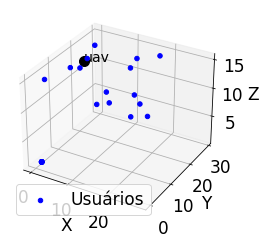

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

[x_plot_xy, y_plot_xy, z_plot_xy] = users_positions.T

ax.scatter(x_plot_xy, y_plot_xy, z_plot_xy, alpha=1, color='blue', label='Usuários')
ax.scatter(coordinates_uav[0], coordinates_uav[1], coordinates_uav[2], alpha=1, color='black', s=100)
ax.text(coordinates_uav[0], coordinates_uav[1], coordinates_uav[2], "uav", color='black', fontsize=14)
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.savefig('graphs/graph_uav.pdf')


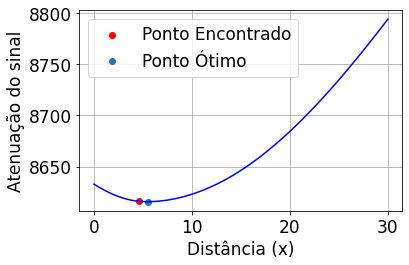

In [29]:
n = 500

plt.rcParams['font.size'] = 17

angle_users = calculate_angle_users(users_positions, coordinates_uav, distance_drone_users)

x = np.linspace(0, 30, num=n)
coordinates_uav_test = list(map(lambda x: [x, 15, 15], x))
steps_loss = list(map(lambda step: loss([step, 15, 15], w, distance_drone_users,
    users_positions,angle_users, g1, g2, g3, g4, carrier_frequency), steps))
y = []
for coordinate in coordinates_uav_test:
    y.append(loss(coordinate, w, distance_drone_users,users_positions,angle_users, g1, g2, g3, g4, carrier_frequency))

plt.grid(True)
plt.ylabel('Atenuação do sinal')
plt.xlabel('Distância (x)')
loss_function_graph,  = plt.plot(x, y, color='blue')
optimal_point = plt.scatter(coordinates_uav[0], loss(coordinates_uav, w, distance_drone_users,users_positions,angle_users, g1, g2, g3, g4, carrier_frequency)
   , color='red', label='Ponto Encontrado')
plt.scatter(x[y.index(np.amin(y))],np.amin(y), label='Ponto Ótimo')
plt.legend()
plt.tight_layout()
plt.savefig('graphs/result_final.pdf')